In [84]:
import pandas as pd # for data analytics
import numpy as np # for numerical computation

#models
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#analytics
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import precision_recall_fscore_support, classification_report,confusion_matrix
from matplotlib import pyplot as plt

In [85]:
data = pd.read_csv("https://raw.githubusercontent.com/renatojmf/Machine-Learning/main/data.csv",encoding = "ISO-8859-1")
data["defects"] = data["defects"].astype(int)
data.head()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,1.30,1.30,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,24.0,5.0,1.0,3.0,63.0,309.13,0.11,9.50,32.54,2936.77,0.10,163.15,1,0,6,0,15.0,15.0,44.0,19.0,9.0,0
3,20.0,4.0,4.0,2.0,47.0,215.49,0.06,16.00,13.47,3447.89,0.07,191.55,0,0,3,0,16.0,8.0,31.0,16.0,7.0,0
4,24.0,6.0,6.0,2.0,72.0,346.13,0.06,17.33,19.97,5999.58,0.12,333.31,0,0,3,0,16.0,12.0,46.0,26.0,11.0,0


In [86]:
#divisão entre dados de treinamento e testes
X = data.drop(['defects'], axis=1)
y = data['defects']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [87]:
k_range = [2,3,4,5,6]
k_scores = []

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=0).fit(X,y)
  scores = cross_val_score(kmeans, X, y, cv=10, scoring='accuracy')
  k_scores.append(scores.mean())

print(k_scores)

[0.8940408163265307, 0.6904489795918367, 0.722, 0.8181224489795916, 0.8021224489795917]


Text(0, 0.5, 'Cross-Validated Accuracy')

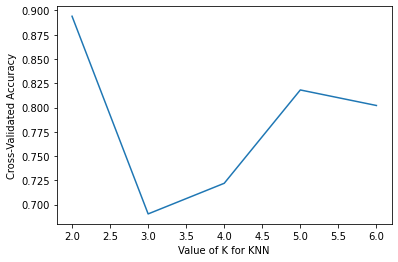

In [88]:
# plotando o valor de K versus a acurácia no cross-validation
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [89]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(data)
X

array([[-0.66832969, -0.47755629, -0.29841641, ..., -0.62579797,
        -0.52787083, -0.33035042],
       [-0.67067103, -0.52552382, -0.40785041, ..., -0.62809994,
        -0.5544364 ,  3.02708859],
       [-0.13216334, -0.04584849, -0.40785041, ..., -0.42092278,
        -0.02312486, -0.33035042],
       ...,
       [ 1.22581255,  0.67366451,  0.13931959, ...,  1.54726022,
         0.77384247,  3.02708859],
       [-0.45995063, -0.40560499, -0.40785041, ..., -0.48998184,
        -0.42160852,  3.02708859],
       [-0.03850983,  0.07407035,  0.68648959, ..., -0.21374563,
         0.10970303,  3.02708859]])

In [90]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [96]:
predictions = kmeans.predict(X)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [92]:
labels = kmeans.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [101]:
centers = kmeans.cluster_centers_
centers

array([[-0.24129889, -0.22949256, -0.19617239, -0.22075564, -0.26017845,
        -0.25417983,  0.08311043, -0.2188482 , -0.21879444, -0.18302794,
        -0.25220683, -0.1830279 , -0.2002934 , -0.1993999 , -0.21442574,
         0.00657291, -0.21423881, -0.25042677, -0.25804093, -0.26098468,
        -0.23502823, -0.06863469],
       [ 2.2110857 ,  2.10290122,  1.79757969,  2.02284251,  2.38408413,
         2.32911722, -0.76156293,  2.00536416,  2.00487146,  1.67713358,
         2.31103806,  1.67713322,  1.83534155,  1.82715421,  1.96483997,
        -0.06022931,  1.96312709,  2.29472694,  2.36449753,  2.39147191,
         2.15362603,  0.62891786]])

In [93]:
from sklearn import metrics
metrics.silhouette_score(X, labels, metric = 'euclidean')

0.6755127184996418

In [94]:
metrics.calinski_harabasz_score(X, labels)

349.74189902728784

In [95]:
df_X = data

cols_of_interest = df_X.columns
def pd_centers(cols_of_interest, centers):
        colNames = list(cols_of_interest)
        colNames.append('prediction')
# Zip with a column called 'prediction' (index)
        Z = [np.append(A, index) for index, A in enumerate(centers)]
# Convert to pandas data frame for plotting
        P = pd.DataFrame(Z, columns=colNames)
        P['prediction'] = P['prediction'].astype(int)
        return P
P = pd_centers(cols_of_interest, kmeans.cluster_centers_)
P

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,b,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects,prediction
0,-0.241299,-0.229493,-0.196172,-0.220756,-0.260178,-0.254180,0.083110,-0.218848,-0.218794,-0.183028,-0.252207,-0.183028,-0.200293,-0.199400,-0.214426,0.006573,-0.214239,-0.250427,-0.258041,-0.260985,-0.235028,-0.068635,0
1,2.211086,2.102901,1.797580,2.022843,2.384084,2.329117,-0.761563,2.005364,2.004871,1.677134,2.311038,1.677133,1.835342,1.827154,1.964840,-0.060229,1.963127,2.294727,2.364498,2.391472,2.153626,0.628918,1
